<a href="https://colab.research.google.com/github/MrNoby47/Deep_learning/blob/main/MNIST_dataset_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import random

In [11]:
np.random.seed(0)


In [12]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train[:10])

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]


In [13]:
assert(X_train.shape[0] == y_train.shape[0]), 'number of images is different to labels'
assert(X_test.shape[0] == y_test.shape[0]), 'number of images is different to labels'
assert(X_train.shape[1:] == (28,28)),'images sizes are not 28*28'
assert(X_test.shape[1:] == (28,28)),'images sizes are not 28*28'

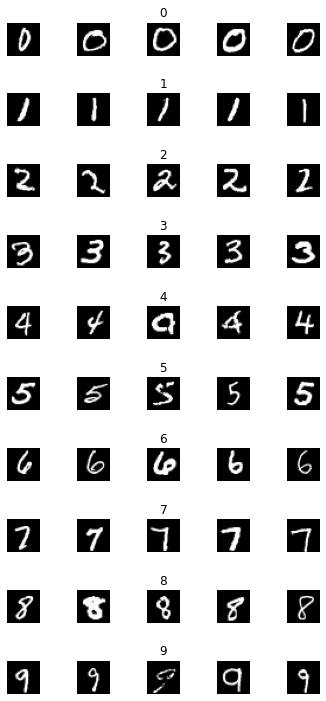

In [14]:
#let's load now the image training from MNIST
num_samples = [] #to count elements number from each class

cols = 5
n_classe = 10
fig,axs = plt.subplots(nrows=n_classe, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(n_classe):
    x_selected = X_train[y_train == j ]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected) - 1),:,:],cmap =plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_samples.append(len(x_selected))

Text(0, 0.5, 'Number of images')

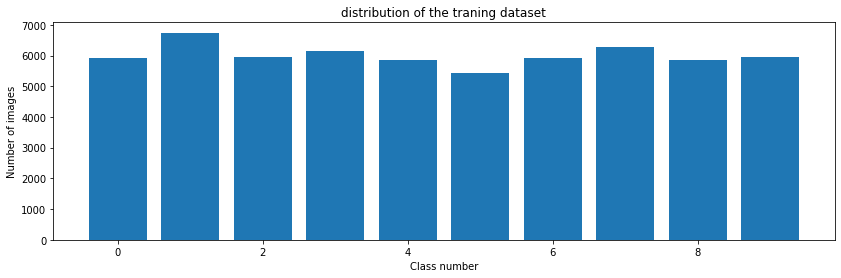

In [15]:
#plot our distribution dataset
plt.figure(figsize=(14,4))
plt.bar(range(0, n_classe), num_samples )
plt.title("distribution of the traning dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [16]:
#Now let's prepare our data for the future Network

#One hot encoding with to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test, 10)

#Normalization for the input layer
 
X_train = X_train/255
X_test = X_test/255

#reshape images size for weights matrix

num_pixels = 784 #28*28 = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test =X_test.reshape(X_test.shape[0], num_pixels)